In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('/content/drivers.csv')

<ipython-input-2-9f9e33300ff7>:2: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drivers.csv')


In [3]:
# Define features
features = [
    'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM',
    'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'THROTTLE_POS', 'SPEED'
]

In [4]:
# Create a new DataFrame with only the needed features
data = data[features]

In [5]:
data.head()

,ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,THROTTLE_POS,SPEED
0,80.0,"48,60%","33,30%",1009.0,49.0,"4,49",25%,0.0
1,80.0,"48,60%","32,50%",1003.0,52.0,"4,51",25%,0.0
2,80.0,"48,60%","32,90%",995.0,51.0,"4,48",25%,0.0
3,80.0,"48,60%","32,50%",1004.0,51.0,"4,51",25%,0.0
4,80.0,"48,60%","32,90%",1005.0,49.0,"4,49",25%,0.0


In [6]:
percentage_cols = ['FUEL_LEVEL','ENGINE_LOAD', 'THROTTLE_POS']
for col in percentage_cols:
    data[col] = data[col].str.replace(',', '.').str.rstrip('%').astype('float') / 100.0

In [11]:
data['MAF'] = data['MAF'].str.replace(',', '.').astype('float')

In [8]:
data.head(5)

,ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,THROTTLE_POS,SPEED
0,80.0,0.486,0.333,1009.0,49.0,4.49,0.25,0.0
1,80.0,0.486,0.325,1003.0,52.0,4.51,0.25,0.0
2,80.0,0.486,0.329,995.0,51.0,4.48,0.25,0.0
3,80.0,0.486,0.325,1004.0,51.0,4.51,0.25,0.0
4,80.0,0.486,0.329,1005.0,49.0,4.49,0.25,0.0


In [12]:
data = data.apply(lambda x: x.fillna(x.mean()))

In [13]:
data

,ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,THROTTLE_POS,SPEED
0,80.000000,0.486000,0.333000,1009.000000,49.000000,4.490000,0.250000,0.000000
1,80.000000,0.486000,0.325000,1003.000000,52.000000,4.510000,0.250000,0.000000
2,80.000000,0.486000,0.329000,995.000000,51.000000,4.480000,0.250000,0.000000
3,80.000000,0.486000,0.325000,1004.000000,51.000000,4.510000,0.250000,0.000000
4,80.000000,0.486000,0.329000,1005.000000,49.000000,4.490000,0.250000,0.000000
...,...,...,...,...,...,...,...,...
60434,81.772023,0.361005,0.404915,1517.803391,47.379728,11.019726,0.179826,24.743751
60435,81.772023,0.361005,0.404915,1517.803391,47.379728,11.019726,0.179826,24.743751
60436,81.772023,0.361005,0.404915,1517.803391,47.379728,11.019726,0.179826,24.743751
60437,81.772023,0.361005,0.404915,1517.803391,47.379728,11.019726,0.179826,24.743751


In [14]:
# Calculate Z-scores for each feature
z_scores = (data - data.mean()) / data.std()

# Calculate percentile ranks for each feature
percentile_ranks = data.rank(pct=True)

# Combine Z-scores or percentile ranks to create an overall score
# You can adjust the weights for each feature based on domain knowledge
overall_score = z_scores.mean(axis=1)  # Using mean of Z-scores as overall score

# Define threshold for overall score
threshold = overall_score.quantile(0.95)  # Example: 95th percentile

# Classify bad driving based on overall score
data['BAD_DRIVING'] = (overall_score > threshold).astype(int)

# Check the distribution of 'BAD_DRIVING' labels
print(data['BAD_DRIVING'].value_counts())


BAD_DRIVING
0    57417
1     3022
Name: count, dtype: int64


In [16]:
# Prepare features and labels
features = [col for col in data.columns if col not in ['BAD_DRIVING']]
X = data[features]
y = data['BAD_DRIVING']

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict on test set
y_pred = clf.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [23]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9942918596955659
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11519
           1       0.96      0.92      0.94       569

    accuracy                           0.99     12088
   macro avg       0.98      0.96      0.97     12088
weighted avg       0.99      0.99      0.99     12088



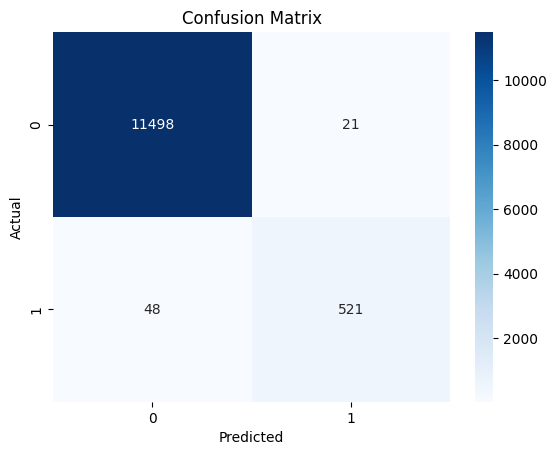

In [22]:
# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
